# Laburo con los datos experimentales

El objetivo de éste notebook es trabajar con los resultados experimentales (generados con `exp_k_alpha.py`). El código que genera los gráficos disponibles en el informe debería estar en su completitud aquí.

Primero que todo tenemos que cargar los datos experimentales:

In [1]:
from pickle import load
from gzip import open as zopen

with zopen('data.pickle.gz') as file:
    df = load(file)

df

,kind,k,alpha,elapsed_time,pca_init_and_fit_time,pca_transform_time,knn_init_and_fit_time,knn_predict_time,y_pred,y_val
0,knnpca,1,1.0,6336183695,4.206655e+09,289273856.0,193840,1840061155,"[8.0, 7.0, 3.0, 3.0, 2.0, 7.0, 2.0, 7.0, 9.0, ...","[[0], [3], [3], [2], [9], [2], [6], [9], [2], ..."
1,knnpca,1,1.0,6286395123,4.060509e+09,341282065.0,286514,1884317578,"[1.0, 1.0, 9.0, 2.0, 3.0, 7.0, 4.0, 1.0, 8.0, ...","[[1], [1], [9], [8], [6], [7], [9], [1], [3], ..."
2,knnpca,1,1.0,5922524897,3.633891e+09,330124722.0,251710,1958257902,"[0.0, 0.0, 1.0, 4.0, 1.0, 2.0, 8.0, 9.0, 0.0, ...","[[0], [0], [7], [5], [1], [3], [3], [7], [0], ..."
3,knnpca,1,1.0,8874212263,6.610431e+09,355860668.0,274742,1907645988,"[3.0, 9.0, 0.0, 8.0, 2.0, 3.0, 5.0, 7.0, 4.0, ...","[[4], [2], [0], [5], [2], [3], [9], [1], [4], ..."
4,knnpca,1,1.0,9420894884,6.959745e+09,330476326.0,228584,2130444641,"[2.0, 1.0, 9.0, 2.0, 9.0, 1.0, 8.0, 1.0, 9.0, ...","[[8], [1], [8], [4], [9], [1], [3], [1], [4], ..."
...,...,...,...,...,...,...,...,...,...,...
4345,knn,29,NaN,482781216811,NaN,NaN,279835268,482501381543,"[0.0, 3.0, 3.0, 2.0, 9.0, 2.0, 6.0, 9.0, 2.0, ...","[[0], [3], [3], [2], [9], [2], [6], [9], [2], ..."
4346,knn,29,NaN,481643740369,NaN,NaN,331859231,481311881138,"[1.0, 1.0, 9.0, 8.0, 6.0, 7.0, 9.0, 1.0, 3.0, ...","[[1], [1], [9], [8], [6], [7], [9], [1], [3], ..."
4347,knn,29,NaN,478506889953,NaN,NaN,278598240,478228291713,"[0.0, 0.0, 7.0, 5.0, 1.0, 3.0, 3.0, 7.0, 0.0, ...","[[0], [0], [7], [5], [1], [3], [3], [7], [0], ..."
4348,knn,29,NaN,477775010840,NaN,NaN,341082097,477433928743,"[4.0, 2.0, 0.0, 5.0, 2.0, 3.0, 9.0, 1.0, 9.0, ...","[[4], [2], [0], [5], [2], [3], [9], [1], [4], ..."


Los datos contienen tanto información de corridas utilizando tano KNN+PCA (`kind == 'knnpca'`) cómo KNN a secas (`kind == 'knn'`) así que separémoslos.

In [2]:
df_knnpca = df[df['kind'] == 'knnpca']
df_knn = df[df['kind'] == 'knn']

print(f'Hay {len(df_knnpca)} corridas usando KNN + PCA')
print(f'Hay {len(df_knn)} corridas usando KNN a secas')

Hay 4205 corridas usando KNN + PCA
Hay 145 corridas usando KNN a secas


Hecho ésto, podemos empezar a explorar los datos usando las bibliotecas de python de siempre.

In [9]:
# Importemos todo :P
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### KNN

Los datos tienen toda la información de evaluación necesaria para evaluar diversas métricas. Podemos usar las implementaciones propias de scikit para trabajar con éstas.

In [7]:
from sklearn.metrics import accuracy_score

knn_accuracy_column = df_knn.apply(
    func=lambda row: accuracy_score(row['y_val'], row['y_pred']),
    axis=1
)
df_knn_accuracy = df_knn[['k']].copy()
df_knn_accuracy['accuracy'] = knn_accuracy_column
df_knn_accuracy

,k,accuracy
4205,1,0.964167
4206,1,0.966905
4207,1,0.966667
4208,1,0.967024
4209,1,0.966310
...,...,...
4345,29,0.951429
4346,29,0.950714
4347,29,0.950476
4348,29,0.950595


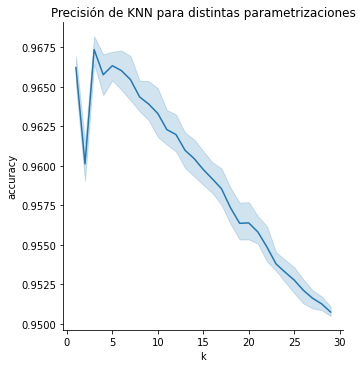

In [8]:
sns.relplot(data=df_knn_accuracy, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNN para distintas parametrizaciones')

### KNN + PCA

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo total')

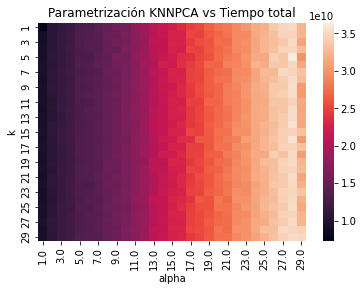

In [4]:
tiempos_totales = df_knnpca.pivot_table(index='k', columns='alpha', values='elapsed_time', aggfunc=np.mean)
sns.heatmap(tiempos_totales).set_title('Parametrización KNNPCA vs Tiempo total')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

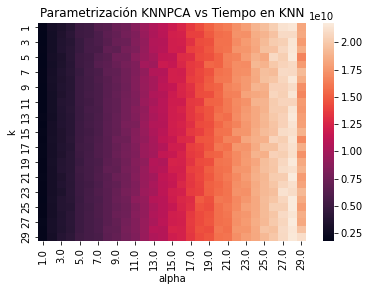

In [10]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_predict_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

In [19]:
df_knnpca

df_knnpca_accuracy_column = df_knnpca.apply(
    func=lambda row: accuracy_score(row['y_val'], row['y_pred']),
    axis=1
)
df_knnpca_accuracy = df_knnpca[['k']].copy()
df_knnpca_accuracy['alpha'] = df_knnpca['alpha']
df_knnpca_accuracy['accuracy'] = df_knnpca_accuracy_column

df_knnpca_accuracy

,k,alpha,accuracy
0,1,1.0,0.250952
1,1,1.0,0.246310
2,1,1.0,0.242024
3,1,1.0,0.247857
4,1,1.0,0.247619
...,...,...,...
4200,29,29.0,0.959286
4201,29,29.0,0.962381
4202,29,29.0,0.961667
4203,29,29.0,0.961786


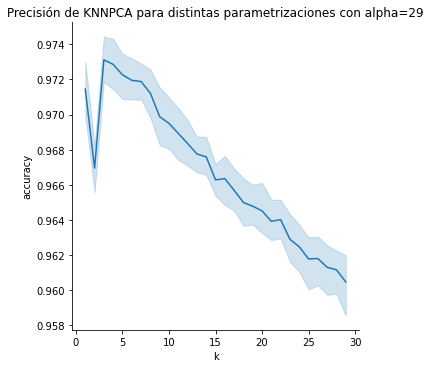

In [22]:
data = df_knnpca_accuracy[df_knnpca_accuracy['alpha'] == 29]

sns.relplot(data=data, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNNPCA para distintas parametrizaciones con alpha=29')